<a href="https://colab.research.google.com/github/denisecammarota/qbio2021/blob/main/gLV_Allee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import scipy as sc
import scipy.integrate as intg
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

rng = np.random.default_rng(seed=3141592)

# r random 0 1
# K random 5 6
# a random 0 .05


**Lotka-Volterra : N species / NO Allee**

In [ ]:
def gLV(t, X, A, K, r):
    X[X < 1e-9] = 0.
    return (X * r) * ((K - (A @ X))/K )

In [ ]:
aux_N = 5
aux_r = np.array([0.3020045, 0.3282690, 0.2337889, 0.3195188, 0.2478758]) # rng.uniform(0, 1, size=aux_N)
aux_K = rng.uniform(5, 6, size=aux_N)
aux_A = rng.uniform(0, 0.1, size=(aux_N, aux_N))
aux_A += np.diag(np.ones(aux_N)) - np.diag(aux_A.diagonal())

gLV(t=0, X=np.ones(aux_N), A=aux_A, K=aux_K, r=aux_r)

array([0.22769914, 0.26149907, 0.18490233, 0.250149  , 0.19747179])

In [ ]:
sol = intg.solve_ivp(fun=gLV, t_span=(0., 1e2), y0=np.ones(aux_N), args=(aux_A, aux_K, aux_r))

Text(0, 0.5, 'Abundances')

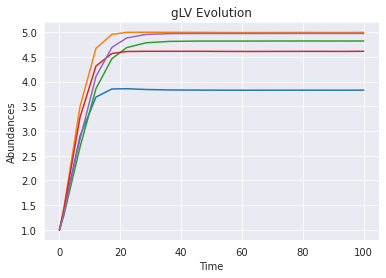

In [ ]:
fig, ax = plt.subplots()

ax.plot(sol.t, sol.y.T)

plt.title("gLV Evolution")
ax.set_xlabel("Time")
ax.set_ylabel("Abundances")

# plt.legend()
# ax.set_yscale('log')
# ax.set_xlim(0,5)

**Animation**

In [ ]:
import os
from moviepy.editor import ImageSequenceClip
from moviepy.video.io.bindings import mplfig_to_npimage


def gif(filename, array, fps=30, scale=1.0, mpl=False):
    """Creates a gif given a stack of images using moviepy
    Notes
    -----
    works with current Github version of moviepy (not the pip version)
    https://github.com/Zulko/moviepy/commit/d4c9c37bc88261d8ed8b5d9b7c317d13b2cdf62e
    Usage
    -----
    >>> X = randn(100, 64, 64)
    >>> gif('test.gif', X)
    Parameters
    ----------
    filename : string
        The filename of the gif to write to
    array : array_like
        A numpy array that contains a sequence of images
    fps : int
        frames per second (default: 10)
    scale : float
        how much to rescale each image by (default: 1.0)
    """

    # ensure that the file has the .gif extension
    fname, _ = os.path.splitext(filename)
    filename = fname + '.gif'

    # transform mpl figures into images
    if mpl is True:
      array = np.array([mplfig_to_npimage(fig) for fig in array])

    # copy into the color dimension if the images are black and white
    if array.ndim == 3:
        array = array[..., np.newaxis] * np.ones(3)

    # make the moviepy clip
    clip = ImageSequenceClip(list(array), fps=fps).resize(scale)
    clip.write_gif(filename, fps=fps)
    return clip

Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)1646592/45929032 bytes (3.6%)4005888/45929032 bytes (8.7%)6340608/45929032 bytes (13.8%)8839168/45929032 bytes (19.2%)11018240/45929032 bytes (24.0%)13352960/45929032 bytes (29.1%)15736832/45929032 bytes (34.3%)18063360/45929032 bytes (39.3%)20258816/45929032 bytes (44.1%)22642688/45929032 bytes (49.3%)24944640/45929032 bytes (54.3%)27189248/45929032 bytes (59.2%)294

In [ ]:
aux_N = 20
aux_r = rng.uniform(0, 1, size=aux_N)
aux_K = rng.uniform(5, 6, size=aux_N)
aux_A = rng.uniform(-0.3, 0.3, size=(aux_N, aux_N))
aux_A += np.diag(np.ones(aux_N)) - np.diag(aux_A.diagonal())

gLV(t=0, X=np.ones(aux_N), A=aux_A, K=aux_K, r=aux_r)

array([0.40403344, 0.78834865, 0.31969829, 0.65311148, 0.93345962,
       0.05549673, 0.40103934, 0.22801088, 0.07550979, 0.30844108,
       0.3368475 , 0.36519579, 0.60573771, 0.27200857, 0.61333563,
       0.49392933, 0.21770411, 0.17006532, 0.08106576, 0.36818761])

In [ ]:
sol = intg.solve_ivp(fun=gLV, t_span=(0., 1e2), y0=np.ones(aux_N), t_eval=np.linspace(0., 1e2, num=62), args=(aux_A, aux_K, aux_r))

Text(0, 0.5, 'Abundances')

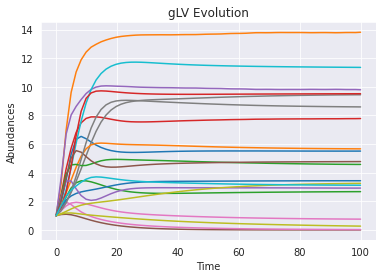

In [ ]:
fig, ax = plt.subplots()

ax.plot(sol.t, sol.y.T)

plt.title("gLV Evolution")
ax.set_xlabel("Time")
ax.set_ylabel("Abundances")

# plt.legend()
# ax.set_yscale('log')
# ax.set_xlim(0,5)


[MoviePy] Building file gLV_evolution.gif with imageio


100%|██████████| 59/59 [00:01<00:00, 52.55it/s]


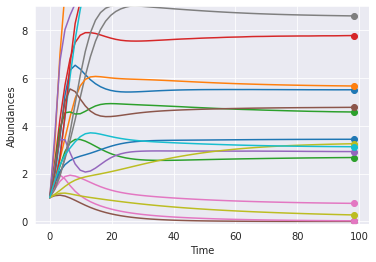

In [ ]:
# matplot subplot
fig, ax = plt.subplots()

# method to get frames
def make_frame(idx):
    
    # clear
    ax.clear()
    
    # plotting line
    ax.plot(sol.t[:idx], sol.y.T[:idx])
    if idx >= 1:
        ax.plot(sol.t[idx-1], np.array([sol.y.T[idx-1]]), 'o')
    
    ax.set_xlabel("Time")
    ax.set_ylabel("Abundances")
    ax.set_ylim(-0.1,9.)
    
    # returning mumpy image
    return mplfig_to_npimage(fig)


gif("gLV_evolution.gif", np.array([make_frame(x) for x in range(4, len(sol.t))]))

**Lotka-Volterra : N species / Allee**

### Neutral Model

In [ ]:
def gLV_allee(t, X, A, K, r, C, m):
    X[X < 1e-9] = 0.
    return (X * r) * ((K - (A @ X))/K ) * (X/(X + C)) - m * X

In [ ]:
def start_points_two(a,b,m,K,c):
  oor = K*(b-m)
  frt = oor**2 - (4*b*(-K*m*c)/(a-1))
  start1 = (oor + np.sqrt(frt))/(2*b)
  start2 = (oor - np.sqrt(frt))/(2*b)
  return start1,start2

In [ ]:
def start_points_notequal(a,b,m,K,c,N_aux):
  apol = b
  bpol = K*(m-b)
  cpol = K*m*c*((a*(2-N_aux)-1)/(a-1))
  root1 = (-bpol + np.sqrt(bpol**2 - 4*apol*cpol))/(2*apol)
  root2 = (-bpol - np.sqrt(bpol**2 - 4*apol*cpol))/(2*apol)
  root1_diff = -(K*m*c)/(b*(a-1)*root1) 
  root2_diff = -(K*m*c)/(b*(a-1)*root2)
  return root1,root2,root1_diff,root2_diff

In [ ]:
def start_points_equal(a,b,m,K,c,N_aux):
  apol = b*(a*(N_aux-1)+1)
  bpol = K*(m-b)
  cpol = K*m*c
  root1 = (-bpol + np.sqrt(bpol**2 - 4*apol*cpol))/(2*apol)
  root2 = (-bpol - np.sqrt(bpol**2 - 4*apol*cpol))/(2*apol)
  return root1,root2

In [ ]:
def eq_neutral(a,b,m,K,c,n):
  oor = K*(b-m)
  frt = oor**2 - 4*((n-1)*a+1)*K*b*m*c
  root1 = (oor + np.sqrt(frt))/(2*b*((n-1)*a+1))
  root2 = (oor - np.sqrt(frt))/(2*b*((n-1)*a+1))
  return root1,root2

In [ ]:
aux_N = 2
aux_r = 0.4
aux_K = 5
aux_A = np.zeros((aux_N, aux_N)) + 0.02
aux_A += np.diag(np.ones(aux_N)) - np.diag(aux_A.diagonal())
aux_C = np.zeros(aux_N) + 0.01
aux_m = np.zeros(aux_N) + 0.3
start1,start2 = start_points_two(aux_A[0,1],aux_r,aux_m[0],aux_K,aux_C[0])
gLV_allee(t=0, X=np.ones(aux_N)+np.array([start1,start2]), A=aux_A, K=aux_K, r=aux_r, C=aux_C, m=aux_m)

array([-0.17777454,  0.01126659])

In [ ]:
sol = intg.solve_ivp(fun=gLV_allee, t_span=(0., 1e3), method="Radau", y0=np.array([start1,start2]), args=(aux_A, aux_K, aux_r, aux_C, aux_m))

Text(0, 0.5, 'Abundances')

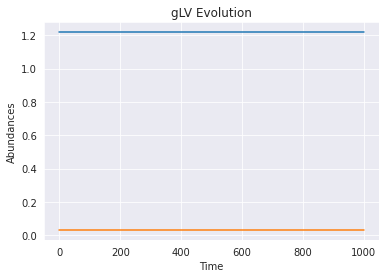

In [ ]:
fig, ax = plt.subplots()

ax.plot(sol.t, sol.y.T)
plt.title("gLV Evolution")
ax.set_xlabel("Time")
ax.set_ylabel("Abundances")
# plt.legend()
# ax.set_yscale('log')
# ax.set_xlim(0,5)

## All N are equal N = 5

In [ ]:
aux_N = 5
aux_r = 0.4
aux_K = 5
aux_A = np.zeros((aux_N, aux_N)) + 0.02
aux_A += np.diag(np.ones(aux_N)) - np.diag(aux_A.diagonal())
aux_C = np.zeros(aux_N) + 0.01
aux_m = np.zeros(aux_N) + 0.3
start1,start2 = start_points_equal(aux_A[0,1],aux_r,aux_m[0],aux_K,aux_C[0],aux_N)
gLV_allee(t=0, X=np.zeros(aux_N)+start1, A=aux_A, K=aux_K, r=aux_r, C=aux_C, m=aux_m)

array([-5.55111512e-17, -5.55111512e-17, -5.55111512e-17, -5.55111512e-17,
        0.00000000e+00])

In [ ]:
sol = intg.solve_ivp(fun=gLV_allee, t_span=(0., 1e3), method="Radau", y0=np.zeros(aux_N)+start2, args=(aux_A, aux_K, aux_r, aux_C, aux_m))

Text(0, 0.5, 'Abundances')

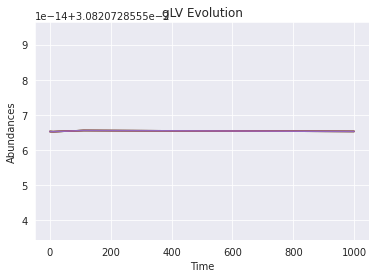

In [ ]:
fig, ax = plt.subplots()

ax.plot(sol.t, sol.y.T)
plt.title("gLV Evolution")
ax.set_xlabel("Time")
ax.set_ylabel("Abundances")
# ax.set_yscale('log')
# ax.set_xlim(0,5)

## N = 5, all equal, one different

In [ ]:
aux_N = 5
aux_r = 0.4
aux_K = 5
aux_A = np.zeros((aux_N, aux_N)) + 0.02
aux_A += np.diag(np.ones(aux_N)) - np.diag(aux_A.diagonal())
aux_C = np.zeros(aux_N) + 0.01
aux_m = np.zeros(aux_N) + 0.3
start1,start2,start1_diff,start2_diff = start_points_notequal(aux_A[0,1],aux_r,aux_m[0],aux_K,aux_C[0],aux_N)

In [ ]:
sol = intg.solve_ivp(fun=gLV_allee, t_span=(0., 1e3), method="Radau", y0=np.array([start2,start2_diff,start2_diff,start2_diff,start2_diff]), args=(aux_A, aux_K, aux_r, aux_C, aux_m))

Text(0, 1.1, 'Calculated, 4 species')

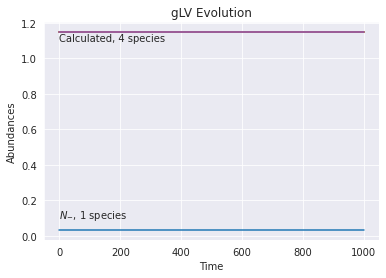

In [ ]:
fig, ax = plt.subplots()

ax.plot(sol.t, sol.y.T)
plt.title("gLV Evolution")
ax.set_xlabel("Time")
ax.set_ylabel("Abundances")
plt.text(0,0.1,r'$N_{-}$, 1 species')
plt.text(0,1.1,r'Calculated, 4 species')
# ax.set_yscale('log')
# ax.set_xlim(0,5)

## All N are equal N = 0 (trivial)

In [ ]:
aux_N = 5
aux_r = 0.4
aux_K = 5
aux_A = np.zeros((aux_N, aux_N)) + 0.02
aux_A += np.diag(np.ones(aux_N)) - np.diag(aux_A.diagonal())
aux_C = np.zeros(aux_N) + 0.01
aux_m = np.zeros(aux_N) + 0.3
start1,start2 = start_points_equal(aux_A[0,1],aux_r,aux_m[0],aux_K,aux_C[0],aux_N)
gLV_allee(t=0, X=np.zeros(aux_N)+start1, A=aux_A, K=aux_K, r=aux_r, C=aux_C, m=aux_m)

array([-5.55111512e-17, -5.55111512e-17, -5.55111512e-17, -5.55111512e-17,
        0.00000000e+00])

In [ ]:
sol = intg.solve_ivp(fun=gLV_allee, t_span=(0., 1e3), method="Radau", y0=np.zeros(aux_N), args=(aux_A, aux_K, aux_r, aux_C, aux_m))

Text(0, 0.5, 'Abundances')

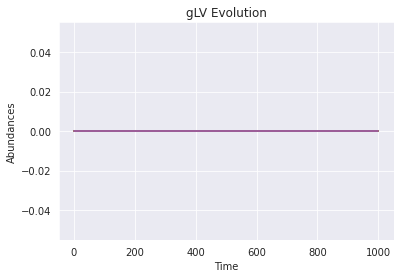

In [ ]:
fig, ax = plt.subplots()

ax.plot(sol.t, sol.y.T)
plt.title("gLV Evolution")
ax.set_xlabel("Time")
ax.set_ylabel("Abundances")
# ax.set_yscale('log')
# ax.set_xlim(0,5)